<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/qf-workshop-2021/introduction-to-machine-learning/blob/main/1_notebooks/introduction-to-machine-learning.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Introduction to Machine Learning

## Regularization

### Ridge Regression 





Ridge regression is a regularization technique where we change the function that is to be minimize. Reduce magnitude of regression coefficients by choosing a parameter $\lambda$ and minimizing
		
\begin{equation}
		\frac{1}{2N} \sum\limits_{n=1}^N \left[h_\theta \left( x^{(n)} \right) - y ^{(n)}\right]^2	+ \lambda \sum\limits_{n=1}^N \theta_i^2 \notag
\end{equation}

This change has the effect of encouraging the model to keep the weights $b_j$ as small as possibile. The Ridge regression should only be used for determining model parameters using the training set. Once the model parameters have been determined the penalty term should be removed for prediction.

In [9]:
columns_titles = ["Salary","Age"]
df2=df1.reindex(columns=columns_titles)
df2

,Salary,Age
0,135000,25
1,105000,27
2,105000,30
3,220000,35
4,300000,40
5,270000,45
6,265000,50
7,260000,55
8,240000,60
9,265000,65


In [10]:
df2['Salary'] = df2['Salary']/1000 
df2['Age2']=df2['Age']**2
df2['Age3']=df2['Age']**3
df2['Age4']=df2['Age']**4
df2['Age5']=df2['Age']**5
df2

,Salary,Age,Age2,Age3,Age4,Age5
0,135.0,25,625,15625,390625,9765625
1,105.0,27,729,19683,531441,14348907
2,105.0,30,900,27000,810000,24300000
3,220.0,35,1225,42875,1500625,52521875
4,300.0,40,1600,64000,2560000,102400000
5,270.0,45,2025,91125,4100625,184528125
6,265.0,50,2500,125000,6250000,312500000
7,260.0,55,3025,166375,9150625,503284375
8,240.0,60,3600,216000,12960000,777600000
9,265.0,65,4225,274625,17850625,1160290625


We can compute the z-score in Pandas using the .mean() and std() methods.

In [11]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
df2_standard = z_score(df2)
df2_standard['Salary'] = df2['Salary']
df2_standard

,Salary,Age,Age2,Age3,Age4,Age5
0,135.0,-1.289948,-1.128109,-0.988322,-0.873562,-0.782128
1,105.0,-1.148195,-1.045510,-0.943059,-0.849996,-0.770351
2,105.0,-0.935566,-0.909699,-0.861444,-0.803378,-0.744782
3,220.0,-0.581185,-0.651577,-0.684372,-0.687799,-0.672266
4,300.0,-0.226804,-0.353745,-0.448740,-0.510508,-0.544103
5,270.0,0.127577,-0.016202,-0.146184,-0.252677,-0.333075
6,265.0,0.481958,0.361052,0.231663,0.107030,-0.004250
7,260.0,0.836340,0.778017,0.693166,0.592463,0.485972
8,240.0,1.190721,1.234693,1.246690,1.229979,1.190828
9,265.0,1.545102,1.731080,1.900602,2.048447,2.174155


In [12]:
y = df2_standard['Salary']
X = df2_standard.drop('Salary',axis=1)

In [13]:
print(y)

0    135.0
1    105.0
2    105.0
3    220.0
4    300.0
5    270.0
6    265.0
7    260.0
8    240.0
9    265.0
Name: Salary, dtype: float64


In [14]:
print(X)

        Age      Age2      Age3      Age4      Age5
0 -1.289948 -1.128109 -0.988322 -0.873562 -0.782128
1 -1.148195 -1.045510 -0.943059 -0.849996 -0.770351
2 -0.935566 -0.909699 -0.861444 -0.803378 -0.744782
3 -0.581185 -0.651577 -0.684372 -0.687799 -0.672266
4 -0.226804 -0.353745 -0.448740 -0.510508 -0.544103
5  0.127577 -0.016202 -0.146184 -0.252677 -0.333075
6  0.481958  0.361052  0.231663  0.107030 -0.004250
7  0.836340  0.778017  0.693166  0.592463  0.485972
8  1.190721  1.234693  1.246690  1.229979  1.190828
9  1.545102  1.731080  1.900602  2.048447  2.174155


Now we implement the Ridge regularization method using the scikit-learn package.  [Scikit-learn](https://scikit-learn.org/stable/index.html) is **one of the most popular Python library for machine learning**.

Why this library is one of the best choices for machine learning projects?

- It has a **high level of support** and **strict governance for the development** of the library which means that it is an incredibly robust tool.

- There is **a clear, consistent code style** which ensures that your machine learning code is easy to understand and reproducible, and also vastly lowers the barrier to entry for coding machine learning models.

- It is **well integrated with the major components of the Python scientific stack**: numpy, pandas, scipy and matplotlib.

- It is **widely supported by third-party tools** so it is possible to enrich the functionality to suit a range of use cases.


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))


Coefficients: 
 [ -32622.57240727  135402.73116519 -215493.11781297  155314.61367273
  -42558.76209732]
Mean squared error: 149.82


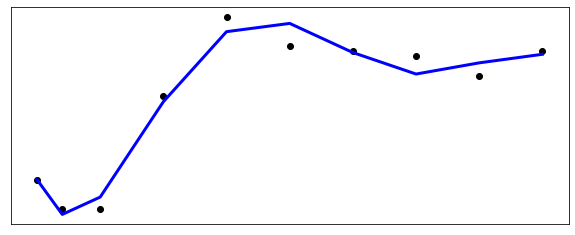

In [16]:
# Plot outputs
plt.scatter(X['Age'], y,  color='black')
plt.plot(X['Age'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [17]:
rr = Ridge(alpha=0.01, normalize=True) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(X, y)

y_pred_r = rr.predict(X)


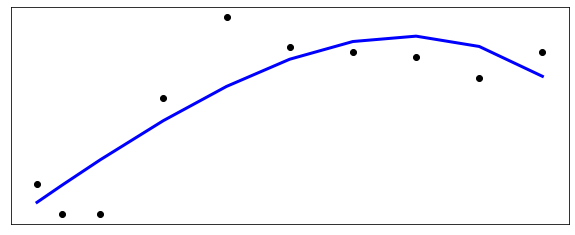

In [18]:
# Plot outputs
plt.scatter(X['Age'], y,  color='black')
plt.plot(X['Age'], y_pred_r, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [19]:
# The coefficients
print('Coefficients: \n', rr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_r))

Coefficients: 
 [119.85726826  32.07576023 -24.12692453 -45.195683   -35.65836346]
Mean squared error: 1148.95


### Lasso Regression



Lasso is short for \textit{Least Absolute Shrinkage and Selection Operator}. It is similar to ridge regression except we minimize

\begin{equation}
		\frac{1}{2N} \sum\limits_{n=1}^N \left[h_\theta \left( x^{(n)} \right) - y ^{(n)}\right]^2 + \lambda \sum\limits_{n=1}^N \vert b_n \vert \notag
\end{equation}

This function cannot be minimized analytically and so a variation on the gradient descent algorithm must be used. Lasso regression also has the effect of simplifying the model. It does this by setting the weights of unimportant features to zero. When there are a large number of features, Lasso can identify a relatively small subset of the features that form a good predictive model.

In [20]:
from sklearn.linear_model import Lasso

lsr = Lasso(alpha=.02, normalize=True, max_iter=1000000) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
lsr.fit(X, y)

y_pred_lsr = lsr.predict(X)

In [21]:
# The coefficients
print('Coefficients: \n', lsr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_lsr))

Coefficients: 
 [ 344.99709034   -0.         -471.80600937   -0.          183.42041303]
Mean squared error: 854.75


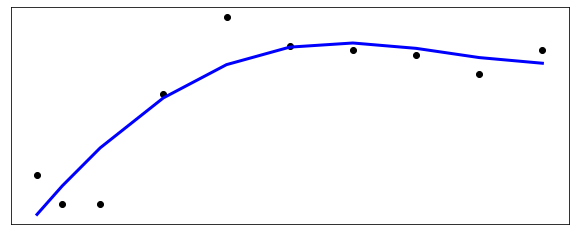

In [22]:
# Plot outputs
plt.scatter(X['Age'], y,  color='black')
plt.plot(X['Age'], y_pred_lsr, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Elastic Net Regression

Middle ground between Ridge and Lasso. Minimize

\begin{equation}
		\frac{1}{2N} \sum\limits_{n=1}^N \left[h_\theta \left( x^{(n)} \right) - y ^{(n)}\right]^2 + \lambda_1 \sum\limits_{n=1}^N b_n^2 + \lambda_2 \sum\limits_{n=1}^N \vert b_n \vert \notag
\end{equation}

In Lasso some weights are reduced to zero but others may be quite large. In Ridge, weights are small in magnitude but they are not reduced to zero. The idea underlying Elastic Net is that we may be able to get the best of both by making some weights zero while reducing the magnitude of the others.

In [23]:
from sklearn.linear_model import ElasticNet

# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

## References

**S. Raschka and V. Mirjalili**, *"Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2"*, 3rd Edition. Packt Publishing Ltd, 2019.
 
**A. Géron**, *"Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"*, 2nd Edition. O’Reilly Media, 2019  
     
[Scikit-Learn web site](https://scikit-learn.org/)   
